In [1]:
!pip install qiskit qiskit-aer qiskit-ibm-runtime ipywidgets pylatexenc


# TP3 – Algoritmo de Bernstein–Vazirani


En esta notebook se presenta e implementa el algoritmo de Bernstein-Vazirani para dar una aplicación del algoritmo de Deutsch-Jozsa como se muestra al final de la sección sobre el mismo en el curso de *Fundamentals of Quantum Algorithms* de IBM.

**Fuente:** https://quantum.cloud.ibm.com/learning/en/courses/fundamentals-of-quantum-algorithms/quantum-query-algorithms/deutsch-jozsa-algorithm

---

## Introducción del problema

Dada una función $f:\{0,1\}^n→\{0,1\}$, el **algoritmo de Bernstein–Vazirani** busca descubrir una cadena binaria secreta $ s \in \{0,1\}^n $ tal que,

$$
f(x) = s \cdot x \;\; \left(\forall x\in\{0,1\}^n\right)
$$

donde $ s \cdot x $ es el producto escalar bit a bit.

En la versión **clásica**, se necesitan al menos **$ \mathbf{n} $ consultas** para descubrir todos los bits de $ s $. (Con una máscara apropiada como argumento de f se puede descubrir cada bit de la cadena de manera individual)  
En la versión **cuántica**, el algoritmo lo logra con **una sola consulta** al oráculo cuántico.

---

## Idea general del algoritmo

1. Preparamos $ n+1 $ qubits en el estado $ |1\rangle|0\rangle^{\otimes n} $.
2. Aplicamos **puertas Hadamard** a todos los qubits obteniendo el estado
$$|-\rangle \otimes \dfrac{1}{\sqrt{2^n}}\sum_{x\in\{0,1\}^n}|x\rangle. $$
3. Aplicamos el **oráculo** que implementa la función $ f(x) $.
4. Aplicamos Hadamard nuevamente a los $ n $ primeros qubits.
5. Medimos.  
   El resultado medido en los primeros $ n $ qubits es exactamente la cadena secreta $ s $.

---
## Razonamiento

Las matemáticas de porque esto funciona estan descriptas en el enlace de la fuente pero lo importante es notar que estos pasos describen el uso del circuito planteado en el algoritmo Deutsch-Josza para un oráculo $U_f$ que debemos determinar según la secuencia $s$ que oculta.

## Implementación en Qiskit
Defino la función que toma un oráculo $U_f$ y lo introduce al algoritmo de Deutsch-Josza

In [2]:
from qiskit import QuantumCircuit

def compile_circuit(function: QuantumCircuit):
    # Compiles a circuit for use in the Deutsch-Jozsa algorithm.

    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.h(range(n + 1))
    qc.compose(function, inplace=True)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

Defino la query gate correspondiente a la cadena $s$ a descubrir

In [3]:
def bv_query(s):
    qc = QuantumCircuit(len(s) + 1)
    for index, bit in enumerate(reversed(s)):
        if bit == "1":
            qc.cx(index, len(s))
    return qc


display(bv_query("1011").draw(output="text"))

q_0: ──■────────────
       │            
q_1: ──┼────■───────
       │    │       
q_2: ──┼────┼───────
       │    │       
q_3: ──┼────┼────■──
     ┌─┴─┐┌─┴─┐┌─┴─┐
q_4: ┤ X ├┤ X ├┤ X ├
     └───┘└───┘└───┘

Finalmente compilamos el circuito con la compuerta generada segun la cadena $s$ y lo simulamos varias veces para observar que el resultado sea consistente

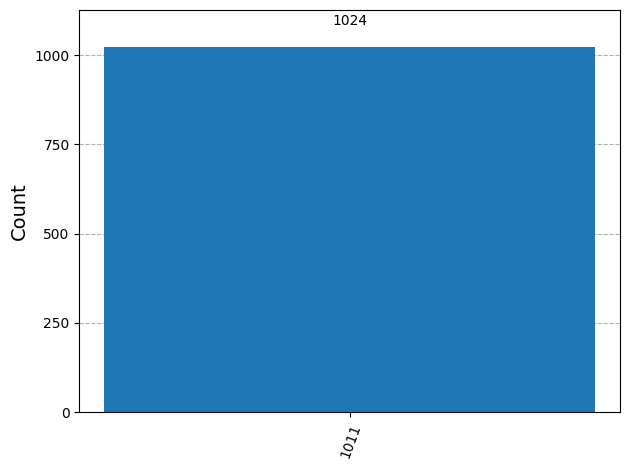

In [4]:
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

def bv_algorithm(function: QuantumCircuit):
    qc = compile_circuit(function)
    sim = Aer.get_backend('qasm_simulator')
    result = sim.run(qc, shots=1024, memory=True).result()
    return result.get_counts()


plot_histogram(bv_algorithm(bv_query("1011")))


## Interpretación de resultados

Podemos ver que  **`s = 1011`** en todas las simulaciones realizadas, esto corresponde exactamente al secreto definido en el oráculo por lo que el algoritmo parece funcionar adecuadamente.

De esta forma, el algoritmo **descubre el patrón completo en una sola consulta**, mientras que un algoritmo clásico necesitaría una consulta por bit.

---

## Conclusiones

- El algoritmo de Bernstein–Vazirani es una aplicación clara y útil del algoritmo de Deutsch–Jozsa.
- Demuestra el poder de los **oráculos cuánticos** y el **paralelismo cuántico** por sobre los algoritmos clásicos.
